In [43]:
import seaborn as sns
import pandas as pd
import numpy as np

titanic = sns.load_dataset("titanic")
df = titanic.copy()
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#### Nicel verileri describe methodu ile inceleyiniz ve verileri ortalaması, standart sapması ve çeyrekliklerine bakarak aykırılık olup olmadığını ve normal dağılıp dağılmadığı konusunda yorumda bulunun.

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


If we check age category there is a huge gap between the max value and third quearter value. I could say this is not a normal distrubitution but we need to see the plot table of it. 

For fare column, It is obviously not an example of normal distributed data.

#### Nitel verilerin dtypelarıını kategorik yapın. Sıralanabilecek kategorik değişkenlerin sıralı olarak belirleyiniz. Sıralanmış kategorik verilerin sıralaması doğru değilse sıralamayı uygun hale getirin.

In [16]:
from pandas.api.types import CategoricalDtype

df.sex=df.sex.astype(CategoricalDtype(ordered=False))
df.alive=df.alive.astype(CategoricalDtype(ordered=False))
df.who=df.who.astype(CategoricalDtype(ordered=False))
df.embark_town=df.embark_town.astype(CategoricalDtype(ordered=False))
df.embarked=df.embarked.astype(CategoricalDtype(ordered=False))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    bool    
dtypes: bool(2), category(7), float64(2), int64(4)
memory usage: 50.7 KB


In [18]:
df.sex=df.sex.astype(CategoricalDtype(ordered=True))
df.who=df.who.astype(CategoricalDtype(ordered=True))
df.sex.head()


0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: category
Categories (2, object): ['female' < 'male']

In [19]:
df.who.head()

0      man
1    woman
2    woman
3    woman
4      man
Name: who, dtype: category
Categories (3, object): ['child' < 'man' < 'woman']

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [29]:
dummy_sex = pd.get_dummies(df.sex)
dummy_pclass = pd.get_dummies(df.pclass)
dummy_sex


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


#### sex ve class değişkenlerini Label Encoder veya Dummies yöntemiyle sayısal verierle dönüştürünüz.

In [24]:
df['sex_encode'] = labelencoder.fit_transform(df.sex)
df['class_encode'] = labelencoder.fit_transform(df['class'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encode,class_encode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,0


In [30]:
dummy_pclass

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


#### age ve fare değişkenlerinin normalliklerini inceleyiniz

In [40]:
import scipy.stats as stats
sample = df.age
t, pvalue = stats.normaltest(sample.dropna())
print({round(pvalue,5)})
'pvalue is less than 0.05, therefore it is not normal distrubition' if pvalue < 0.05 else 'pvalue is more than 0.05, therefore it is normal distrubition'


{0.00012}


'pvalue is less than 0.05, therefore it is not normal distrubition'

In [41]:
sample = df.fare
t, pvalue = stats.normaltest(sample.dropna())
print({round(pvalue,5)})
'pvalue is less than 0.05, therefore it is not normal distrubition' if pvalue < 0.05 else 'pvalue is more than 0.05, therefore it is normal distrubition'


{0.0}


'pvalue is less than 0.05, therefore it is not normal distrubition'

## Question 2

## Hipothesis Tests 
`H0 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi yoktur.
 H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.`


Hipotez test asamalarinin tamamini yukarda önerilen hipotez icin uygulayınız ve sonucu yorumlayiniz.

In [80]:
import sys
!{sys.executable} -m pip install ipy_table

  Created wheel for ipy-table: filename=ipy_table-1.15.1-py3-none-any.whl size=18767 sha256=da8a9f1130ed0340aebde5da1d65f018a08cda696a91df049bd2893e53839e59
  Stored in directory: c:\users\abuze\appdata\local\pip\cache\wheels\28\9a\6c\235ab11c6eda0ea6dc621383e3dbbf26671fa068420ad321dc
Successfully built ipy-table


In [81]:


#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipy_table as tbl
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\abuze\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sample', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [82]:
def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

### Removing missing ages

In [85]:
missing_ages = df[df['age'].isnull()]
# determine mean age based on Sex and Pclass
mean_ages = df.groupby(['sex','pclass'])['age'].mean()

def remove_na_ages(row):
    '''
    function to check if the age is null and replace wth the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['age']):
        return mean_ages[row['sex'],row['pclass']]
    else:
        return row['age']

df['age'] = df.apply(remove_na_ages, axis=1)

In [90]:
# Count number of passengers and number of survivors in sample data
sample_passengers = len(df)
sample_survivors = len(df[df.survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors


survivors_data = df[df.survived==True]
non_survivors_data = df[df.survived==False]

survivors = [
    ['Item','Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers', sample_passengers,'-'],
    ['Survivors', 
         sample_survivors,
         calculate_percentage(sample_survivors,sample_passengers, True) 
    ],
    ['Non-survivors', 
         sample_nonsurvivors,
         calculate_percentage(sample_nonsurvivors,sample_passengers, True) 
    ]
]
tbl.make_table(survivors)

Item,Sample Dataset (Count),Sample Dataset (%)
Total Passengers,891,-
Survivors,342,38.38%
Non-survivors,549,61.62%


In [71]:
table = pd.crosstab(df['survived'],df['pclass'])
print(table)

pclass      1   2    3
survived              
0          80  97  372
1         136  87  119


In [75]:
df.groupby('pclass').survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [94]:
# Count number of passengers and number of survivors in sample data
sample_passengers = len(df)
sample_survivors = len(df[df.survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors


survivors_data = df[df.survived==True]
non_survivors_data = df[df.survived==False]

survivors = [
    ['Item','Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers', sample_passengers,'-'],
    ['Survivors',
         sample_survivors,
         calculate_percentage(sample_survivors,sample_passengers, True) 
    ],
    ['Non-survivors',
         sample_nonsurvivors,
         calculate_percentage(sample_nonsurvivors,sample_passengers, True) 
    ]
]
tbl.make_table(survivors)

Item,Sample Dataset (Count),Sample Dataset (%)
Total Passengers,891,-
Survivors,342,38.38%
Non-survivors,549,61.62%


Text(0.5, 1.0, '% of survivors by class')

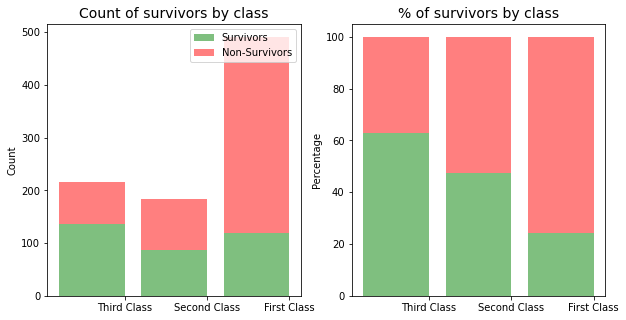

In [97]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Third Class', 'Second Class', 'First Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

In [99]:

table = pd.crosstab([df['survived']], df['pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,102.8890
P-Value,0.0000


As the P-Value is less than 0.05 the probability of that the social class will impact the chances of survival is high. Therefore I believe that we can reject the null hypothesis. I also believe that the plots above confirm this result.